In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

(a) You have the Train and test data below. Visualize them using a scatter plot.

In [2]:
x_train = np.array([[3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,
           7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,
           0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]]).reshape(-1,1)
y_train = np.array([46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,
           84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99
           ,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,
           4.90,55.44,50.09,155.66,45.57,18.12,30.58])
x_test = np.array([[5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]]).reshape(-1,1)
y_test = np.array([98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13])

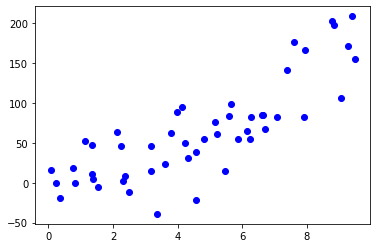

In [3]:
plt.scatter(x_train, y_train, c='b')
plt.scatter(x_test, y_test, c='b')
plt.show()

(b) Fit the best linear regression model for the training data. Report the model coefficients and
both the 𝑅2 value and mean square error for the fit of that model for the training data.

In [4]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print("The coeficient is {} and the intercept is {}".format(lr.coef_, lr.intercept_))
print("The mean squared error is: {}".format(mean_squared_error(y_train, lr.predict(x_train))))
print("The R2 score is: {}".format(r2_score(y_train, lr.predict(x_train))))

The coeficient is [18.30320685] and the intercept is -21.73078292905422
The mean squared error is: 1052.5853662498014
The R2 score is: 0.7014590913812251


We can show the regression line using the coefficients or we can just simply use the build-in seaborn.regplot

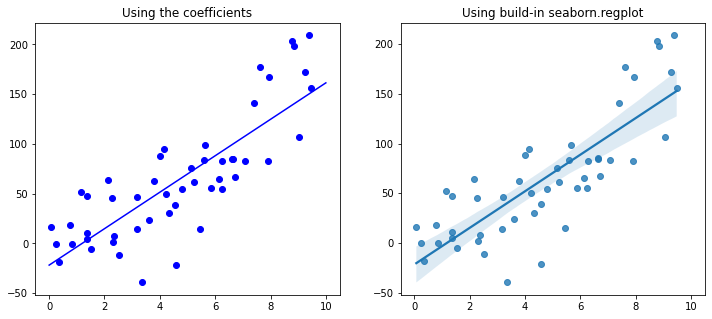

In [5]:
fig,axes = plt.subplots(1, 2, sharex=True, figsize = (12,5))

axes[0].scatter(x_train, y_train, c='b')
axes[0].scatter(x_test, y_test, c='b')
a = np.linspace(0,10)
axes[0].plot(a, a*lr.coef_ + lr.intercept_,c='b')

sns.regplot(x = np.concatenate((x_train, x_test)), y = np.concatenate((y_train, y_test)), ax=axes[1])

axes[0].set_title('Using the coefficients')
axes[1].set_title('Using build-in seaborn.regplot')

plt.show()

We can change the order of the polynomial in the seaborn.regplot function to see which one better estimates the model

Considering only up to order 6 of the polynomial

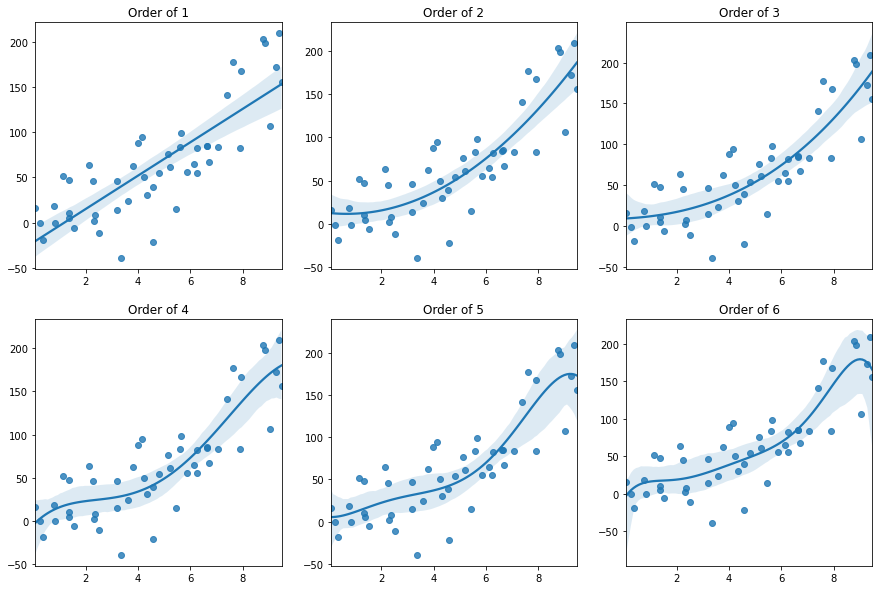

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))
order = 1
for i in range(0,2):
    for j in range(0,3):
        sns.regplot(x = np.concatenate((x_train, x_test)), y = np.concatenate((y_train, y_test)), order=order, ax=axes[i][j])
        axes[i][j].set_title('Order of {}'.format(order))
        order += 1
plt.show()

Looks like order of 2 is a good fit

So we add a new feature i.e. x^2
Then we fit the model on the new training set, and report the mse and R2 score

In [7]:
new_train = np.concatenate((x_train,x_train**2),axis=1)
new_lr = LinearRegression()
new_lr.fit(new_train,y_train)
print("The coeficient is {} and the intercept is {}".format(new_lr.coef_, new_lr.intercept_))
print("The mean squared error is: {}".format(mean_squared_error(y_train, new_lr.predict(new_train))))
print("The R2 score is: {}".format(r2_score(y_train, new_lr.predict(new_train))))

The coeficient is [0.47100686 1.83208191] and the intercept is 8.007337461589657
The mean squared error is: 884.797759660905
The R2 score is: 0.7490480719353505


The mse decreased by about 10 percent and the R2 also improved

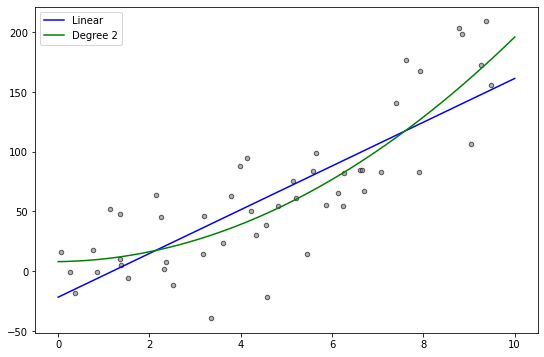

In [8]:
plt.figure(figsize=(9,6))
plt.scatter(x = np.concatenate((x_train, x_test)), y = np.concatenate((y_train, y_test)),
            c='gray', alpha=0.6, s=20, edgecolors='k')
plt.plot(a, a*lr.coef_ + lr.intercept_, c='b', label='Linear')
plt.plot(a, a*new_lr.coef_[0]+a**2*new_lr.coef_[1] + new_lr.intercept_ , c='g', label='Degree 2')
plt.legend()
plt.show()

(e) Use both model and apply them to the test data and estimate the 𝑅2 and mean square
error of the test dataset.

In [9]:
y_pred = lr.predict(x_test)
new_pred = new_lr.predict(np.concatenate((x_test,x_test**2),axis=1))
mean_squared_error(y_test,y_pred)

print("Mean squared error for linear model is {} and for non-linear degree of 2 is {}"
     .format(mean_squared_error(y_test,y_pred), mean_squared_error(y_test,new_pred)))
print("R2 score for linear model is {} and for non-linear degree of 2 is {}"
     .format(r2_score(y_test,y_pred), r2_score(y_test,new_pred)))

Mean squared error for linear model is 2023.3121088887128 and for non-linear degree of 2 is 1398.8817580143948
R2 score for linear model is 0.5556465885794163 and for non-linear degree of 2 is 0.6927820089560344


In [10]:
train_mse=[mean_squared_error(y_train, lr.predict(x_train))]
test_mse=[mean_squared_error(y_test, lr.predict(x_test))]
train=x_train
test=x_test
for i in range(2,8):
    train = np.concatenate((train,x_train**i),axis=1)
    test = np.concatenate((test,x_test**i),axis=1)
    model = LinearRegression()
    model.fit(train,y_train)
    train_mse.append(mean_squared_error(y_train, model.predict(train)))
    test_mse.append(mean_squared_error(y_test, model.predict(test)))

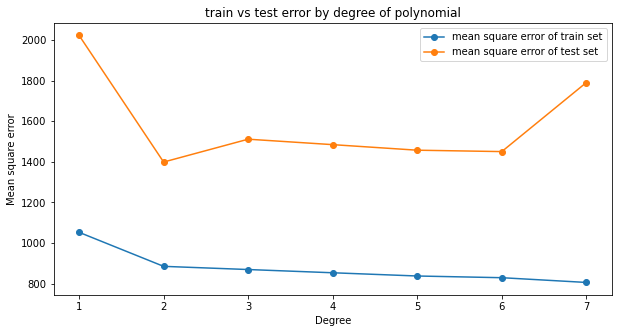

In [11]:
plt.figure(figsize=(10,5))
plt.plot(range(1,8),train_mse,marker='o', label='mean square error of train set')
plt.plot(range(1,8), test_mse,marker='o', label='mean square error of test set')
plt.xticks(range(1,8,1))
plt.title('train vs test error by degree of polynomial')
plt.xlabel("Degree")
plt.ylabel('Mean square error')
plt.legend()
plt.show()